<a href="https://colab.research.google.com/github/Habiba3495/social-media-analytics/blob/main/KFC_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 15.2 MB/s eta 0:00:00


In [ ]:
import praw
import pandas as pd
from datetime import datetime
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
reddit = praw.Reddit(
    client_id='h7bb6qM3vSClVlGLgqwZ0g',
    client_secret='AOzCFq7UYJo_H_mR3150v2unmi3YJw',
    user_agent='sentamint analysis for kfc'
)

# Test the connection
print(reddit.read_only)

True


In [ ]:
subreddit = reddit.subreddit("KFC+KentuckyFriedChicken")
posts = []

for post in subreddit.hot(limit=30):  # top 30 posts
    if post.selftext and isinstance(post.selftext, str):
      posts.append({
          "content": post.selftext,
          "user": post.author.name if post.author else 'Anonymous',
          "date": datetime.utcfromtimestamp(post.created_utc).strftime('%Y-%m-%d %H:%M:%S')
        })


# Save the data to a CSV file
df = pd.DataFrame(posts)
df.to_csv("KFC_posts.csv", index=False)
print("Data saved to KFC_posts.csv")

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Data saved to KFC_posts.csv


In [ ]:
df.head(10)

,content,user,date
0,I'm still waiting for the KFC console,PresentationKey6949,2024-12-09 16:25:15
1,TENDERSDEAL,quiet-teengirl,2024-12-09 14:04:38
2,Still feel like a crime was committed taking t...,Sackonfire,2024-12-09 21:02:08
3,Please help me decode the orders on this recei...,akatsukinoshana,2024-12-08 17:03:18
4,Looney Tunes Back In Action Toys 1 Bugs Bunny ...,Silver_Cartoonist151,2024-12-08 09:47:14
5,Price just went up $2.75 on the Uber eats app ...,TheGookieMonster,2024-12-08 21:42:25
6,They stopped making the KFC Chicken bowls and ...,rogers12345678,2024-12-07 10:50:17
7,1 Bugs Bunny Spy Car 2 Yosemite Sam Card Launc...,Silver_Cartoonist151,2024-12-07 09:41:05
8,To be fair the wings were free off the app\n\n...,PintsofMilk,2024-12-06 22:41:28
9,4 Toys Build Your Dexter Robot,Silver_Cartoonist151,2024-12-06 09:35:23


In [ ]:
# Preprocessing
def preprocess_text(text):
    # Remove URLs and special characters
    text = re.sub(r"http\S+|@\S+|#\S+|[^A-Za-z\s]|\d", "", text)

    #lowercase
    text = text.lower()

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]

    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

df['processed_content'] = df['content'].apply(preprocess_text)

# Save preprocessed data
df.to_csv("preprocessed_KFC_data.csv", index=False)
print("Preprocessing complete.")

Preprocessing complete.


In [ ]:
df.head(10)

,content,user,date,processed_content
0,I'm still waiting for the KFC console,PresentationKey6949,2024-12-09 16:25:15,im still waiting kfc console
1,TENDERSDEAL,quiet-teengirl,2024-12-09 14:04:38,tendersdeal
2,Still feel like a crime was committed taking t...,Sackonfire,2024-12-09 21:02:08,still feel like crime committed taking menu
3,Please help me decode the orders on this recei...,akatsukinoshana,2024-12-08 17:03:18,please help decode order receipt thank
4,Looney Tunes Back In Action Toys 1 Bugs Bunny ...,Silver_Cartoonist151,2024-12-08 09:47:14,looney tune back action toy bug bunny spy car ...
5,Price just went up $2.75 on the Uber eats app ...,TheGookieMonster,2024-12-08 21:42:25,price went uber eats app im wondering thats re...
6,They stopped making the KFC Chicken bowls and ...,rogers12345678,2024-12-07 10:50:17,stopped making kfc chicken bowl always loved r...
7,1 Bugs Bunny Spy Car 2 Yosemite Sam Card Launc...,Silver_Cartoonist151,2024-12-07 09:41:05,bug bunny spy car yosemite sam card launcher t...
8,To be fair the wings were free off the app\n\n...,PintsofMilk,2024-12-06 22:41:28,fair wing free app super charger tower box mea...
9,4 Toys Build Your Dexter Robot,Silver_Cartoonist151,2024-12-06 09:35:23,toy build dexter robot


In [ ]:
# VADER sentiment
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] > 0.05:
        return "Positive"
    elif score['compound'] < -0.05:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["processed_content"].apply(analyze_sentiment)
df.to_csv("KFC_sentiment.csv", index=False)
print("Sentiment analysis completed.")

Sentiment analysis completed.


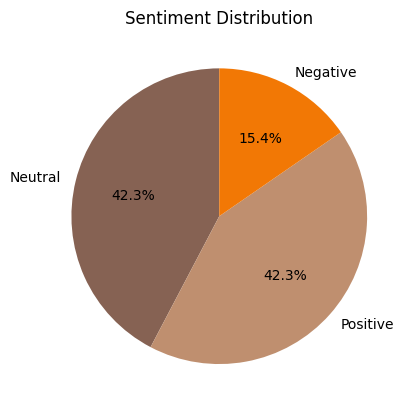

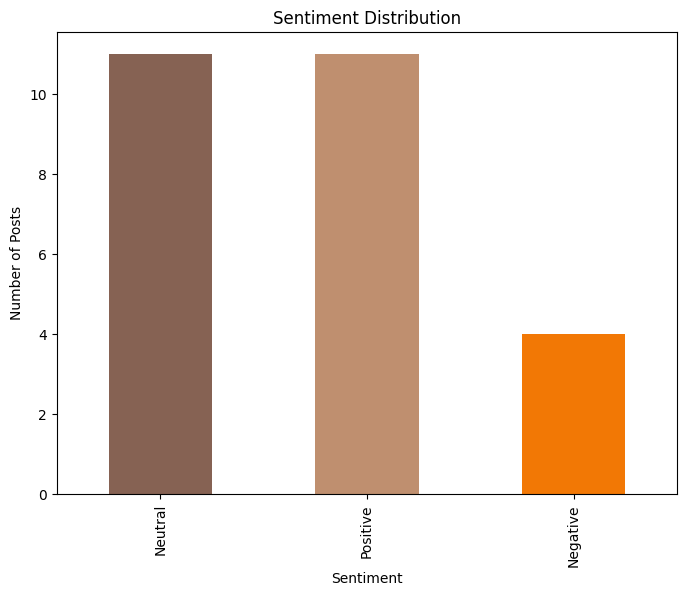

In [ ]:
#Bar Chart for Sentiment Distribution
sentiment_counts = df['sentiment'].value_counts()  # Count sentiments using Pandas


# Pie chart using Pandas
sentiment_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["#866253", "#BF8F6F", "#F27805"], title="Sentiment Distribution")
plt.ylabel("")  # Remove y-axis label
plt.show()

# Plot bar chart
sentiment_counts.plot(kind='bar', color=["#866253", "#BF8F6F", "#F27805"], figsize=(8, 6))
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Posts")
plt.show()

In [ ]:
# Frequent keywords
from collections import Counter

def get_top_keywords(df, sentiment):
    words = " ".join(df[df["sentiment"] == sentiment]["processed_content"]).split()
    return Counter(words)

positive_keywords = get_top_keywords(df, "Positive")
negative_keywords = get_top_keywords(df, "Negative")

print("Top Positive Keywords:", positive_keywords)
print("Top Negative Keywords:", negative_keywords)

Top Positive Keywords: Counter({'kfc': 7, 'work': 6, 'im': 5, 'location': 5, 'year': 5, 'someone': 4, 'resume': 4, 'get': 4, 'cranberry': 4, 'kfcs': 3, 'one': 3, 'want': 3, 'app': 3, 'different': 3, 'ive': 3, 'anyone': 3, 'soda': 3, 'chicken': 3, 'recipe': 2, 'love': 2, 'hot': 2, 'wing': 2, 'hour': 2, 'going': 2, 'else': 2, 'another': 2, 'local': 2, 'box': 2, 'checked': 2, 'corporate': 2, 'thanks': 2, 'tried': 2, 'two': 2, 'place': 2, 'order': 2, 'ago': 2, 'like': 2, 'put': 2, 'problem': 2, 'recently': 2, 'first': 2, 'best': 2, 'dont': 2, 'used': 2, 'know': 2, 'cant': 2, 'use': 2, 'next': 2, 'id': 2, 'amazing': 2, 'gravy': 2, 'city': 2, 'fry': 2, 'coke': 2, 'corbin': 2, 'kentucky': 2, 'allowed': 1, 'ask': 1, 'delicious': 1, 'normally': 1, 'fan': 1, 'spicy': 1, 'food': 1, 'make': 1, 'home': 1, 'live': 1, 'away': 1, 'nearest': 1, 'friend': 1, 'mine': 1, 'apply': 1, 'job': 1, 'locally': 1, 'evaluates': 1, 'person': 1, 'along': 1, 'passed': 1, 'go': 1, 'whats': 1, 'branch': 1, 'barely': 1,

#recommendations for KFC :

1. Improve Food Quality: Reduce grease and enhance the taste of the
chicken to address complaints about "greasy" and "terrible" food.

2. Offer Better Value: Introduce discounts or meal bundles to address
concerns about "price."
3. Enhance App Experience: Add features like loyalty rewards and
exclusive deals to improve customer convenience.
4. Communicate Quality Improvements: Highlight food quality
improvements to reassure customers.
5. Support Local Stores: Ensure high service standards and food quality
across all locations.